In [14]:
import pandas as pd

df = pd.read_csv('merged_data_with_university.csv')

df.head()

,대학교 이름,가게 이름,가게 평균 평점,리뷰어 리뷰수,리뷰 텍스트,리뷰 날짜,가게 방문수,태그들
0,서울시립대학교,컴투레스트,4.55,326,서울권에 있는 카페 거의 다가봤는데 개인적으로 1등 1티어입니다 친구들 회기오면 무...,11.11.월,7,"커피가 맛있어요, 디저트가 맛있어요, 특별한 메뉴가 있어요, 아늑해요, 차분한 분위기에요"
1,서울시립대학교,컴투레스트,4.55,514,분위기도 좋은데 커피가 너무 맛있어요. 디카페인커피는 경험상 일반 아메리카노보다 맛...,10.26.토,1,"커피가 맛있어요, 디저트가 맛있어요"
2,서울시립대학교,컴투레스트,4.55,379,오랫만에 왔는데 여전히 커피도 맛있네요!! 시나몬카푸치노였는데 은은한 시나몬향과 살...,10.22.화,1,"커피가 맛있어요, 대화하기 좋아요"
3,서울시립대학교,컴투레스트,4.55,97,한번 와보고 싶었던 곳인데 드디어 와봅니다.\n판나코타 궁금했는데 이건 1인 1개 ...,7.25.목,1,"디저트가 맛있어요, 특별한 메뉴가 있어요, 인테리어가 멋져요, 아늑해요"
4,서울시립대학교,컴투레스트,4.55,324,오늘 1일.2카페!\n동생이 경희대 근처 커피집 다 이쁘고 맛나다고 ㅋ\n지나가다 ...,7.4.목,1,"커피가 맛있어요, 인테리어가 멋져요, 사진이 잘 나와요, 대화하기 좋아요, 차분한 ..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115817 entries, 0 to 115816
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   대학교 이름    115817 non-null  object
 1   가게 이름     115817 non-null  object
 2   가게 평균 평점  115817 non-null  object
 3   리뷰어 리뷰수   115817 non-null  object
 4   리뷰 텍스트    111790 non-null  object
 5   리뷰 날짜     115817 non-null  object
 6   가게 방문수    115817 non-null  int64 
 7   태그들       108579 non-null  object
dtypes: int64(1), object(7)
memory usage: 7.1+ MB


In [29]:
import re

# 태그 전처리 함수 정의 (중요 단어 추출)
def extract_important_words(tags):
    if not isinstance(tags, str):
        return ""  # 비어있는 경우 빈 문자열 반환

    # 특정 패턴에 따라 중요 단어 추출 규칙 정의
    replacements = {
        "청결해요": "청결",
        "특별한 메뉴": "특별한메뉴",
        "친절해요": "친절",
        "커피가 맛있어요": "커피",
        "인테리어가 멋져요": "인테리어",
        "사진이 잘 나와요": "사진",
        "대화하기 좋아요": "대화하기",
        "아늑해요": "아늑함",
        "차분한 분위기에요": "차분한분위기",
        "디저트가 맛있어요":"디저트",
        "특별한메뉴가 있어요":"특별한 메뉴",
        "음료가 맛있어요":"음료",
        "집중하기 좋아요" : "집중",
        "가성비가 좋아요": "가성비",
        "빵이 맛있어요":"빵",
        "매장이 청결" : "청결",
        "화장실이 깨끗해요" : "화장실이 깨끗해요"
        # 필요한 경우 여기에 추가
    }

    # 교체 규칙 적용
    for key, value in replacements.items():
        tags = tags.replace(key, value)

    # 중복된 공백 제거
    tags = re.sub(r"\s+", " ", tags).strip()

    return tags

# 태그 전처리 적용
df['태그들'] = df['태그들'].apply(extract_important_words)

# 전처리 결과 확인
print(df['태그들'].head())

0    커피, 디저트, 특별한메뉴, 아늑함, 차분한분위기
1                        커피, 디저트
2                       커피, 대화하기
3          디저트, 특별한메뉴, 인테리어, 아늑함
4     커피, 인테리어, 사진, 대화하기, 차분한분위기
Name: 태그들, dtype: object


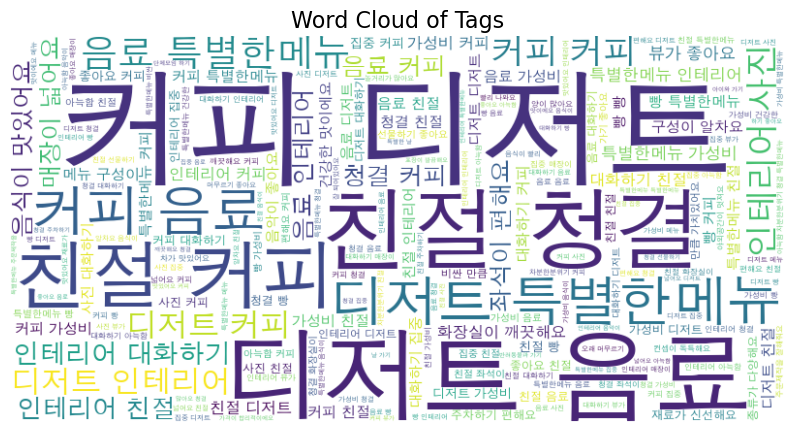

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 태그 데이터를 하나의 텍스트로 결합
df['태그들'] = df['태그들'].fillna('')
tag_text = ' '.join(df['태그들'].tolist())
font_path = '/Library/Fonts/AppleGothic.ttf'
# WordCloud 생성
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 지정
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate(tag_text)

# WordCloud 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tags", fontsize=16)
plt.show()